# Flatmaps of medium parcellation

In [11]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
import SUITPy as suit
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt
import os
import nitools as nt


from pathlib import Path
import numpy as np
import Functional_Fusion.atlas_map as am
import scipy.linalg as sl
import nibabel as nb
import nitools as nt
import re
import fsl
from fsl.data.image import Image
from matplotlib.colors import ListedColormap


In [ ]:
figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"
atlas_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'


In [88]:
def ortho(data, voxel, fig=None, cursor=False, background=None, **kwargs):
    """Simple orthographic plot of a 3D array using matplotlib.

    :arg data:   3D numpy array
    :arg voxel:  XYZ coordinates for each slice
    :arg fig:    Existing figure and axes for overlay plotting
    :arg cursor: Show a cursor at the `voxel`

    All other arguments are passed through to the `imshow` function.

    :returns:   The figure and orthogaxes (which can be passed back in as the
                `fig` argument to plot overlays).
    """

    voxel = [int(round(v)) for v in voxel]

    data = np.asanyarray(data, dtype=np.float)
    data[data <= 0] = np.nan

    x, y, z = voxel
    xslice = np.flipud(data[x, :, :].T)
    yslice = np.flipud(data[:, y, :].T)
    zslice = np.flipud(data[:, :, z].T)

    if fig is None:
        fig = plt.figure()
        xax = fig.add_subplot(1, 3, 1)
        yax = fig.add_subplot(1, 3, 2)
        zax = fig.add_subplot(1, 3, 3)
    else:
        fig, xax, yax, zax = fig

    # Plot black square the size of each slice
    if background == 'black':
        for ax, slc in zip((xax, yax, zax), (xslice, yslice, zslice)):
            ax.imshow(np.zeros_like(slc), cmap='gray')
    
    xax.imshow(xslice, **kwargs)
    yax.imshow(yslice, **kwargs)
    zax.imshow(zslice, **kwargs)

    if cursor:
        cargs = {'color': (0, 1, 0), 'linewidth': 1}
        xax.axvline(y, **cargs)
        xax.axhline(data.shape[2] - z, **cargs)
        yax.axvline(x, **cargs)
        yax.axhline(data.shape[2] - z, **cargs)
        zax.axvline(x, **cargs)
        zax.axhline(data.shape[1] - y, **cargs)

    for ax in (xax, yax, zax):
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout(pad=0)

    # Remove border from image
    for ax in (xax, yax, zax):
        for side in ('top', 'bottom', 'left', 'right'):
            ax.spines[side].set_visible(False)
    
     

    return (fig, xax, yax, zax)


In [86]:
suit_template   = Image(f'{ut.atlas_dir}/tpl-SUIT/tpl-SUIT_T1w.nii')
suit_data       = suit_template.data
suit_data[suit_data < 100] = 0

atlas_label     = nb.load(f'{ut.atlas_dir}/tpl-SUIT/atl-NettekovenSym32_space-SUIT_dseg.nii')
seg_image       = Image(atlas_label.get_fdata())

In [49]:
seg_data = seg_image.data
_, cmap32, labels = nt.read_lut(atlas_dir + 'NettekovenSym32.lut')
cmap32_l = ListedColormap(cmap32[1:])

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_3212/3710341617.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.asanyarray(data, dtype=np.float)


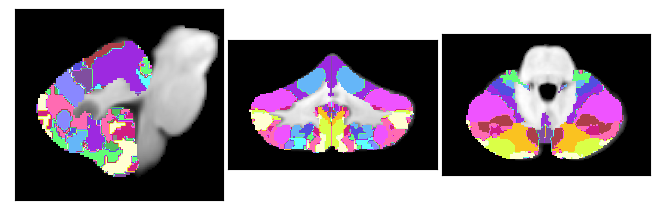

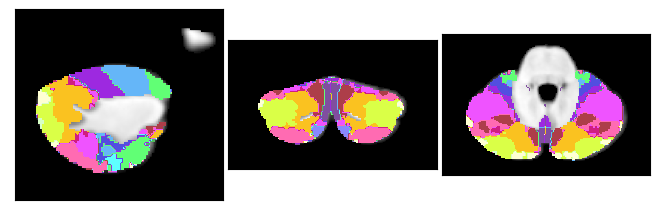

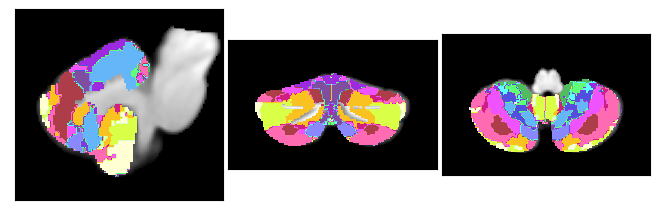

In [83]:
background = 'black'

voxels = [78, 44, 47]
fig = ortho(suit_data, voxels, background=background, cmap=plt.cm.gray)
fig = ortho(seg_data, voxels, fig=fig, cmap=cmap32_l)
plt.savefig(figure_path + f'atlas_volume_action_{background}.png', dpi=300)

voxels = [49, 25, 46]
fig = ortho(suit_data, voxels, background=background, cmap=plt.cm.gray)
fig = ortho(seg_data, voxels, fig=fig, cmap=cmap32_l)
plt.savefig(figure_path + f'atlas_volume_social_{background}.png', dpi=300)

voxels = [62, 28, 26]
fig = ortho(suit_data, voxels, background=background, cmap=plt.cm.gray)
fig = ortho(seg_data, voxels, fig=fig, cmap=cmap32_l)
plt.savefig(figure_path + f'atlas_volume_demand_{background}.png', dpi=300)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_3212/1978598449.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.asanyarray(data, dtype=np.float)


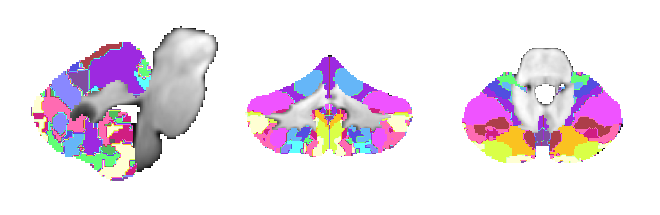

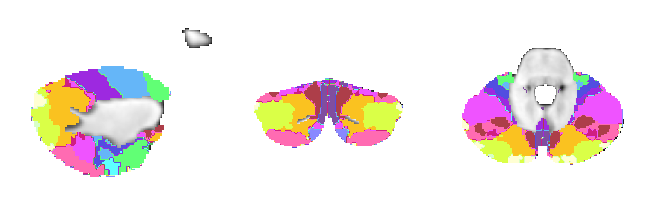

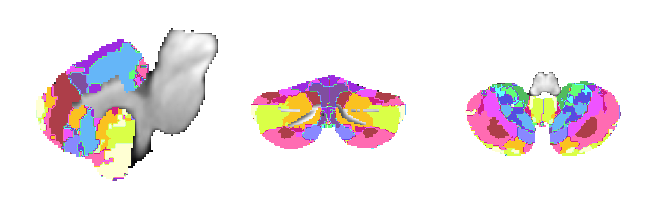

In [90]:
background = 'white'

voxels = [78, 44, 47]
fig = ortho(suit_data, voxels, background=background, cmap=plt.cm.gray)
fig = ortho(seg_data, voxels, fig=fig, cmap=cmap32_l)
plt.savefig(figure_path + f'atlas_volume_action_{background}.png', dpi=300)

voxels = [49, 25, 46]
fig = ortho(suit_data, voxels, background=background, cmap=plt.cm.gray)
fig = ortho(seg_data, voxels, fig=fig, cmap=cmap32_l)
plt.savefig(figure_path + f'atlas_volume_social_{background}.png', dpi=300)

voxels = [62, 28, 26]
fig = ortho(suit_data, voxels, background=background, cmap=plt.cm.gray)
fig = ortho(seg_data, voxels, fig=fig, cmap=cmap32_l)
plt.savefig(figure_path + f'atlas_volume_demand_{background}.png', dpi=300)


In [8]:
# Figure settings
figsize=(8,8)
colorbar=False
bordersize=4

background='black'
if background=='black':
    bordercolor='w'
    backgroundcolor='k'
else:
    bordercolor='k'
    backgroundcolor='w'
    